<a href="https://colab.research.google.com/github/ambika-1513/ML-Doodles/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/placement.csv')

In [ ]:
data.head()#overview

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
data.shape

(100, 4)

In [38]:
"""
Steps:-

prepocess +EDA-->(visualisation blah blah) +Feature selection
extract input and output cols-->(eperating)
scale the values --(0...1)
train test split
apply algo
evaluation
deploying...!
"""

'\nSteps\nprepocess +EDA-->(visualisation blah blah) +Feature selection\nextract input and output cols-->(eperating)\nscale the values --(0...1)\ntrain test split\napply algo\nevaluation\ndeploying...!\n'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
data = data.iloc[:,1:] #1

In [ ]:
data.head()


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt

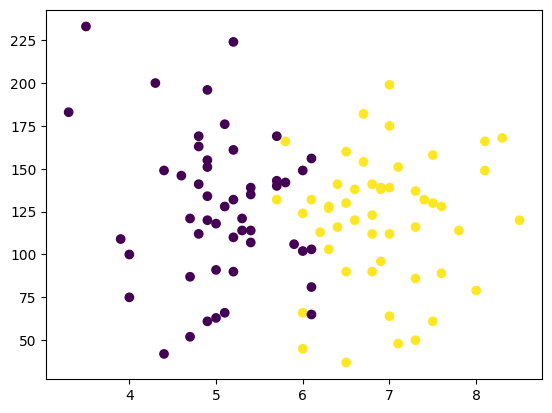

In [ ]:
plt.scatter(data['cgpa'],data['iq'],c = data['placement']) #EDA

In [ ]:
 x = data.iloc[:,0:2]
 y = data.iloc[:,-1]

In [ ]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y

,placement
0,1
1,0
2,0
3,1
4,0
5,1
6,0
7,0
8,0
9,0


In [ ]:
from sklearn.model_selection import train_test_split
x_tr , x_te , y_tr , y_te= train_test_split(x , y , test_size = 0.1)

In [ ]:
x_tr

,cgpa,iq
11,6.9,138.0
25,5.0,91.0
71,6.1,132.0
34,4.8,163.0
62,6.0,102.0
...,...,...
38,6.5,160.0
26,7.0,199.0
41,5.4,114.0
57,6.5,130.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x_tr = sc.fit_transform(x_tr)

In [ ]:
x_tr

array([[ 0.84491897,  0.39936509],
       [-0.81387717, -0.80385025],
       [ 0.14647849,  0.24576313],
       [-0.98848729,  1.03937325],
       [ 0.05917343, -0.52224666],
       [ 0.67030885,  1.52577945],
       [ 1.19413921, -0.93185188],
       [-1.4250126 ,  1.98658533],
       [ 0.84491897, -0.67584862],
       [-1.07579235, -0.90625155],
       [-0.90118223,  0.83457064],
       [-0.46465693,  0.32256411],
       [-0.11543669,  1.11617423],
       [-0.63926705, -0.82945057],
       [-0.72657211, -1.44385841],
       [ 0.14647849, -0.49664633],
       [-0.98848729,  1.19297521],
       [ 0.14647849, -1.05985351],
       [ 0.14647849, -1.46945873],
       [-0.90118223, -0.06144078],
       [ 0.75761391, -0.26624339],
       [ 1.36874933, -1.57186004],
       [ 0.93222403,  0.42496542],
       [-1.07579235, -0.03584046],
       [-0.90118223,  1.88418402],
       [ 0.32108861,  0.1177615 ],
       [ 0.23378355, -0.24064307],
       [-0.11543669,  0.5017664 ],
       [-0.55196199,

In [ ]:
x_te = sc.transform(x_te)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
m = LogisticRegression()

In [ ]:
m.fit(x_tr,y_tr)

LogisticRegression()

In [ ]:
m.predict(x_te)

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [ ]:
y_te

,placement
35,1
8,0
20,1
39,0
29,1
16,0
3,1
91,1
74,1
77,1


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_te, m.predict(x_te))

0.9

In [ ]:
#how to plot decision boundary library(mlextend)
from mlxtend.plotting import plot_decision_regions

<Axes: >

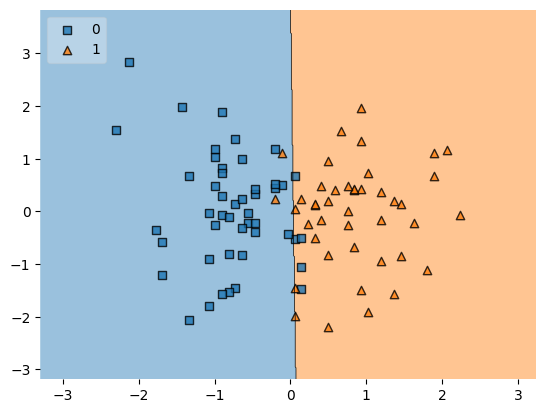

In [ ]:
plot_decision_regions(x_tr, y_tr.values , clf = m , legend = 2)

In [ ]:
import pickle #converts objects --> file

In [ ]:
pickle.dump(m , open('model.pkl', 'wb'))